In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 2
Using the bayes classifier and the parameters below for each data set, find the optimal class for data. ( Note: No training needed! )
| Dataset | $\mu_1$ | $\mu_2$ | $\sigma_{11}$ | $\sigma_{12}$ | $\sigma_{22}$ |
| ------- | ------- | ------- | ------------- | ------------- | ------------- |
| $A1$ | $0$ | $0$ | $1$ | $-0.8$ | $1$ |
| $A2$ | $2$ | $2$ | $1$ | $0.8$ | $1$ |
| $B1$ | $0$ | $0$ | $1$ | $-0.75$ | $1$ |
| $B2$ | $0$ | $0$ | $1$ | $0.75$ | $1$ |
| $C1$ | $0$ | $0$ | $1.75$ | $0$ | $0.25$ |
| $C2$ | $0$ | $0$ | $0.25$ | $0$ | $1.75$ |
| $D1$ | $0$ | $0$ | $1$ | $0$ | $1$ |
| $D2$ | $0$ | $0$ | $9$ | $0$ | $9$ |
| $E1$ | $0$ | $0$ | $3$ | $1$ | $0.5$ |
| $E2$ | $-0.8$ | $0.8$ | $3$ | $1$ | $0.5$ |
| $F1$ | $0$ | $0$ | $3$ | $1$ | $0.5$ |
| $F2$ | $1$ | $6$ | $3$ | $1$ | $0.5$ |






As we know from bayes classifier we need to find the posterior of data using the equation below:
$$
\begin{equation}
p(x|c) = \int p(x|\theta) p(\theta|c) d\theta
\end{equation}
$$
*Note:* c is the class label. <br>
but since the question gave us the $\theta$ ( $\mu$ and $\sigma$ ), we can find the value of $p(x|D)$ using the guassian distribution below. <br>
*Note*: we know that $p(x|D)$ is using the Gaussian distribution from the question.
$$
\begin{equation}
p(x|D^{class\_no}) = N(\mu^{class\_no}, \Sigma^{class\_no})
\end{equation}
$$
And the Normal or Gaussian distribution formula for multivariate distributions is as below:
$$
\begin{equation}
N(\mu^{class\_no}, \Sigma^{class\_no}) = \frac{1}{\sqrt{2\pi |\Sigma|}} e^{ -\frac{1}{2} (x-\mu)^t \Sigma^{-1} (x-\mu)}
\end{equation}
$$


Since the covariance matrix is a symmetrical matrix we know that $\sigma_{12} = \sigma_{21}$, So we use this point to compute the covariance matrix ($\Sigma$).

In [2]:
## compute the probability of x using the x value
def guassian_multivariate(mu ,Sigma, x1, x2):
    """
    calculate the probability of multivariate guassian
    we have a feature space of 2 by 1

    INPUTS:
    --------
    mu:  is the mean value 
    Sigma:  covariance matrix
    x1:  feature one, a scalar value
    x2:  feature two, a scalar value

    OUTPUT:
    -------
    probability:  A scalar value representing the probability of X features 
    """

    coefficient = 1 / 2 * np.pi
    ## inverse of covariance matrix
    Sigma_inv = np.linalg.inv(Sigma)

    ## the features array (transposing it to make it as 2 by 1 vector)
    X = np.array([x1, x2]).T

    ## exponential power value ( the superscript) 
    e_superscript =  (-1/2) * np.dot((X - mu).T , Sigma_inv ).dot(X) 
    
    e = np.exp(e_superscript)

    # covariance determanant
    det_Sigma = np.linalg.det(Sigma)
    probability = coefficient * np.sqrt(det_Sigma) * e

    return probability


In [3]:
## calculate the probability for the first data in A dataset

## read the csv dataset
ds_A = pd.read_csv('../processed_dataset/Atrain.csv')

## cov matrix and mean vector for class 1
A_Sigma1 = np.matrix('1 -0.8; -0.8 1')
A_mu1 = np.array([0, 0])

x1 = ds_A['feature_one'].iloc[0]
x2 = ds_A['feature_two'].iloc[0]

guassian_multivariate(A_mu1, A_Sigma1, x1, x2)

matrix([[0.29520456]])

In [4]:
## cov matrix and mean vector for class 2
A_Sigma2 = np.matrix('1 0.8; 0.8 1')
A_mu2 = np.array([2, 2])

guassian_multivariate(A_mu2, A_Sigma2, x1, x2)

matrix([[0.00240618]])

And now we have calculated posterior probability for the first data in Atrain dataset and we can see that the probability for class 1 is much more than class 2, So class one is the classified output and it can be seen as below it is the right class. (class 1 has the label 0 and class 2 has the label 1)

In [5]:
ds_A['label'].iloc[0]

0

## capsulation of testing for all data
Now we wil test the all above calculation for all data (In A dataset)

In [6]:
## cov matrix and mean vector for class 1
A_Sigma1 = np.matrix('1 -0.8; -0.8 1')
A_mu1 = np.array([0, 0])

## cov matrix and mean vector for class 2
A_Sigma2 = np.matrix('1 0.8; 0.8 1')
A_mu2 = np.array([2, 2])

## save the classified label for each data
classified_labels = []
for i in range(0, len(ds_A)):

    x1 = ds_A['feature_one'].iloc[i]
    x2 = ds_A['feature_two'].iloc[i]

    ## calculate the probability for calss 1
    p_class1 = guassian_multivariate(A_mu1, A_Sigma1, x1, x2)
    ## calculate the probability for calss 2
    p_class2 = guassian_multivariate(A_mu2, A_Sigma2, x1, x2)

    ## class 2 has the label 1 (True)
    ## class 1 has the label 0 (False)
    label = p_class2 > p_class1

    classified_labels.append(label)


In [7]:
## check the correct classified labels
correct_classified = (np.array(classified_labels).flatten() == ds_A.label).sum()
print('count of correct classfied: ', correct_classified)
print('acc: ', correct_classified / len(ds_A) * 100, '%')

count of correct classfied:  1790
acc:  89.5 %


## part A
Calculate the classification accuracy using the bayes classifier and given information for A to F datasets. Also compare the results with ideal classifier.  

In [8]:
def check_confusion_matrix(actual_label, target_label):
    """
    create the confusion matrix and accuracy and insert them into a pandas dataframe 

    INPUTS:
    ---------
    actual_label:  the label classified by the classifier
    target_label:  the right labels for data from dataset

    OUTPUT:
    -----------
    confusion_matrix:  A Dataset with with elements of TP, TN, FP, FN, accuarcy as True Positives, True Negatives, False Positives, False Negative, and classifier accuracy
    """
    
    a = np.array(actual_label)
    t = np.array(target_label)
    
    TP = ((a == True) & (t == True)).sum()
    TN = ((a == False) & (t == False)).sum()
    FP = ((a == True) & (t == False)).sum()
    FN = ((a == False) & (t == True)).sum()
 
    confusion_matrix = pd.DataFrame(data={'TP':[TP], 'TN': [TN], 'FP': [FP], 'FN': [FN]})
    confusion_matrix['accuracy'] = (a == t).sum() * 100 / len(actual_label)
    
    return confusion_matrix

def bayes_classifier(datasets_name, mu_s, Sigma_s):
    """
    use the bayes classifier for multiple datasets

    INPUTS:
    --------
    datasets:  array of multiple datasets name
    mu_s:  [mu1, mu2] multidimensional array, array of mean for class1 and class2 vectors for each dataset (Note each mu shape is 2*1)
    Sigma_s:  [Sigma1, Sigma2] multidimensional array, array of covariance for class1 and class2 vectors for each dataset

    OUTPUT:
    --------
    ds_results:  pandas dataframe of results containing dataset_name,confusion_matrix and accuracy
    """

    ## check the values are correctly entered
    assert len(datasets_name) == len(mu_s), 'Error! not enough mean array for datasets was given!\ndatasets array length must be equal to mean (mu) array length '
    assert len(Sigma_s) == len(mu_s), 'Error! not enough Sigma data for mu datas was given!\ncovariance (Sigma) array length must be equal to mean array length '
    assert len(Sigma_s) == len(datasets_name), 'Error! not enough Sigma data for datasets was given!\ncovariance (Sigma) array length must be equal to dataset array length'

    ## check all the parameters for each class was entered correctly!
    ## the Sigma_s or the covariance array has the shape of 6 arrays and each array consist of two matrixes with 4 element (2 by 2 matrix) 
    assert len(Sigma_s.flatten()) == len(Sigma_s) * 2 * 4, 'Error! covariances for each class was not entered correctly!\nSigma_s shape is 6 arrays of two matrixes with 4 element (2 by 2 matrix)'
    assert len(mu_s.flatten()) == len(mu_s) * 2 * 2, 'Error! mean for each class was not entered!\nmu_s must be an array of six elements each element of contains a vector by size of 2*1!'


    ds_results = pd.DataFrame(columns=[ 'dataset', 'TP', 'TN', 'FP', 'FN', 'accuracy'])
    
    ## iterate over each dataset
    for i in range(0, len(datasets_name)):

        ## to save each label
        classified_labels = []
        ## read dataset
        dataset = pd.read_csv(datasets_name[i])
        
        ## iterate to get each row in dataset
        for j in range(0, len(dataset)):
            
            ## get each feature for each row
            x1 = dataset['feature_one'].iloc[j]
            x2 = dataset['feature_two'].iloc[j]

            ## calculate the probability for calss 1
            p_class1 = guassian_multivariate(mu_s[i][0], Sigma_s[i][0], x1, x2)

            ## calculate the probability for calss 2
            p_class2 = guassian_multivariate(mu_s[i][1], Sigma_s[i][1], x1, x2)

            ## class 2 has the label 1 (True)
            ## class 1 has the label 0 (False)
            label = p_class2 > p_class1

            classified_labels.append(label)
        
        ## result of one of the datasets
        ds_partial_result = pd.DataFrame()
        ds_partial_result = check_confusion_matrix(classified_labels, dataset.label)
        ds_partial_result['dataset'] = datasets_name[i][-10:]

        ds_results = ds_results.append(ds_partial_result, ignore_index=True)

    return ds_results
    

In [9]:
## create the mean vectors array for each dataset A, B, C, D, E, F
mu_s = np.array([[[0,0], [2, 2]], 
            [[0,0], [0,0]], 
            [[0,0], [0,0]],
            [[0,0], [0,0]], 
            [[0,0], [-0.8,0.8]],
            [[0,0], [1,6]]])

## create the covariance matrix array for each dataset A, B, C, D, E, F
## each class have different covariance
Sigma_A1 = np.matrix('1 -0.8; -0.8 1')
Sigma_A2 = np.matrix('1 0.8; 0.8 1')

Sigma_B1 = np.matrix('1 -0.75; -0.75 1')
Sigma_B2 = np.matrix('1 0.75; 0.75 1')

Sigma_C1 = np.matrix('1.75 0; 0 0.25')
Sigma_C2 = np.matrix('0.25 0; 0 1.75')

Sigma_D1 = np.matrix('1 0; 0 1')
Sigma_D2 = np.matrix('9 0; 0 9')

Sigma_E1 = np.matrix('3 1; 1 0.5')
Sigma_E2 = np.matrix('3 1; 1 0.5')

Sigma_F1 = np.matrix('3 1; 1 0.5')
Sigma_F2 = np.matrix('3 1; 1 0.5')

## appand all into an array
Sigma_s = np.array([[Sigma_A1, Sigma_A2],
                    [Sigma_B1, Sigma_B2],
                    [Sigma_C1, Sigma_C2],
                    [Sigma_D1, Sigma_D2],
                    [Sigma_E1, Sigma_E2],
                    [Sigma_F1, Sigma_F2] ])

dataset_names = []
for char in ['A', 'B', 'C', 'D', 'E', 'F']:
    dataset_names.append(f"../processed_dataset/{char}train.csv")

result_ds = bayes_classifier(dataset_names, mu_s, Sigma_s)

In [10]:
result_ds

,dataset,TP,TN,FP,FN,accuracy
0,Atrain.csv,975,815,185,25,89.50
1,Btrain.csv,787,796,204,213,79.15
2,Ctrain.csv,804,783,217,196,79.35
3,Dtrain.csv,1000,0,1000,0,50.00
4,Etrain.csv,993,500,500,7,74.65
5,Ftrain.csv,1000,502,498,0,75.10


### Result
Now we tested our bayes classifier and saw that it can be a classifier since we know our distribution parameters

In [11]:
## run the bayes classifier script
import os
os.chdir('scripts')
os.system('python3 bayes_classifier.py')
## and get back to the default directory
os.chdir('..')

Result saved in Q2_p1_out.csv


## Part B
If we change the covariance distributions into diagonal or isotropic, how it affect the results? 

To change the covariance matrixes into isotropic format we need to get the eigenvalues of covariance matrixes and exchange the elements with eigenvalues for diagonal and zero for off diagonal elements.

In [12]:
### Calculate the isotropic matrixes
Sigma_s_isotropic = []

## for each dataset covariances
for idx, matrix in enumerate(Sigma_s):

    Sigma_s_isotropic.append([])
    ## for each class covariances
    for j in range (0,2):
        eigvalues, _ = np.linalg.eig(matrix[j])
        Sigma_s_isotropic[idx].append( np.matrix( [[eigvalues[0], 0], [0, eigvalues[1]]]) )

## convert to a numpy array
Sigma_s_isotropic = np.array(Sigma_s_isotropic)

In [13]:
isotropic_res = bayes_classifier(dataset_names, mu_s, np.array(Sigma_s_isotropic))


In [14]:
print("Part A results\n", result_ds, "\n\nPART B results\n", isotropic_res)

Part A results
       dataset    TP   TN    FP   FN  accuracy
0  Atrain.csv   975  815   185   25     89.50
1  Btrain.csv   787  796   204  213     79.15
2  Ctrain.csv   804  783   217  196     79.35
3  Dtrain.csv  1000    0  1000    0     50.00
4  Etrain.csv   993  500   500    7     74.65
5  Ftrain.csv  1000  502   498    0     75.10 

PART B results
       dataset    TP    TN    FP    FN  accuracy
0  Atrain.csv   978   497   503    22     73.75
1  Btrain.csv     0  1000     0  1000     50.00
2  Ctrain.csv   804   783   217   196     79.35
3  Dtrain.csv  1000     0  1000     0     50.00
4  Etrain.csv   892   499   501   108     69.55
5  Ftrain.csv  1000   516   484     0     75.80


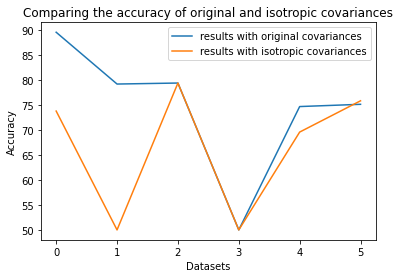

In [15]:
plt.plot(result_ds.accuracy)
plt.plot(isotropic_res.accuracy)
plt.legend(['results with original covariances', 'results with isotropic covariances'])
plt.title('Comparing the accuracy of original and isotropic covariances')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.show()

We can see with creating an isotropic covariance would not much help the accuracy

In [17]:
## save the knn result with isotropic and non-isotropic results is a csv file
final_reuslts = pd.DataFrame(columns=['isotropic', 'dataset', 'TP', 'TN', 'FP', 'FN', 'accuracy'])
result_ds['isotropic'] = False
isotropic_res['isotropic'] = True

final_reuslts = final_reuslts.append(result_ds, ignore_index=True)
final_reuslts = final_reuslts.append(isotropic_res, ignore_index=True)
final_reuslts.to_csv('Q2-results.csv')
final_reuslts

,isotropic,dataset,TP,TN,FP,FN,accuracy
0,False,Atrain.csv,975,815,185,25,89.50
1,False,Btrain.csv,787,796,204,213,79.15
2,False,Ctrain.csv,804,783,217,196,79.35
3,False,Dtrain.csv,1000,0,1000,0,50.00
4,False,Etrain.csv,993,500,500,7,74.65
5,False,Ftrain.csv,1000,502,498,0,75.10
6,True,Atrain.csv,978,497,503,22,73.75
7,True,Btrain.csv,0,1000,0,1000,50.00
8,True,Ctrain.csv,804,783,217,196,79.35
9,True,Dtrain.csv,1000,0,1000,0,50.00
